# Project Name - Uber Request Data

## Project Type - EDA/Regression

## Contribution - Individual

## Team Member 1 - Sejal Rajore

# Project Summary - 

# Github Link - 

# Problem Statement

## Define Your Business Objective ?

# General Guidelines :-

# Let's Begin !

# 1. Know Your Data

## Import Libraries

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Loading

In [14]:
# Load Dataset
file_path = "C:/Users/sejal rajore/Downloads/Uber Request Data.csv"
data = pd.read_csv(file_path)

## Dataset First View

In [15]:
# Dataset First View
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
data.shape

(6745, 6)

## Dataset Information

In [18]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## Duplicate Values

In [19]:
# Dataset Duplicate Value count
data.duplicated().sum()

0

## Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
data.isnull().sum().sum()

6564

## What did you Know about your dataset ?

# 2. Understanding Your Variables

In [21]:
# Dataset Columns
data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [22]:
# Dataset Describe
data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [ ]:
## Variable Description

In [23]:
data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

## Cheack Unique Values for each variable.

In [24]:
# Check Unique Values For each variable.
data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

# 3. Data Wrangling

## Data Wrangling Code

In [25]:
# Convert timestamp columns to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Extract hour and day
df['Hour'] = df['Request timestamp'].dt.hour
df['Day'] = df['Request timestamp'].dt.day_name()
df['Trip Duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60


## What all manipulations have you done and insights you found ?

# 4. Data Visualization , storytelling and Experimenting with charts: Understand the relationship between variables.

## Chart - 1 [Request count by status]

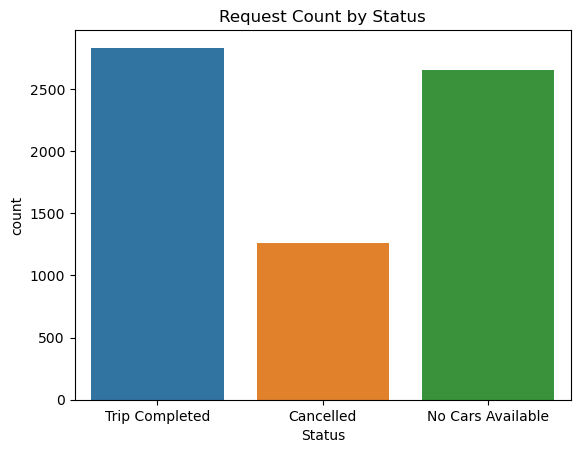

In [26]:
sns.countplot(x='Status', data=df)
plt.title("Request Count by Status")
plt.show()


## 1. Why did you pick the specific chart ?

## 2. what is/are insight(s) found from the chart ?

## 3. will the gained insights help creating a positive business impact ?

## are there any insights that iead to negative growth ? justify with negative reason .

# chart - 2 [Request by hours]

C:\Users\sejal rajore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


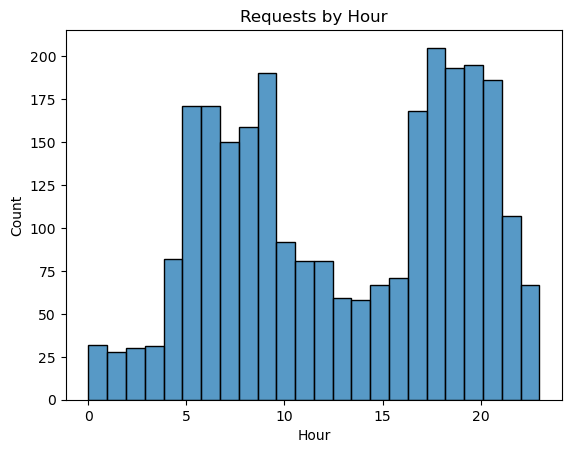

In [27]:
sns.histplot(df['Hour'], bins=24)
plt.title("Requests by Hour")
plt.show()


## 1. Why did you pick the specific chart?

##  2. What is/are the insight(s) found from the chart? 

## 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

# chart - 3 [pick up points vs status]

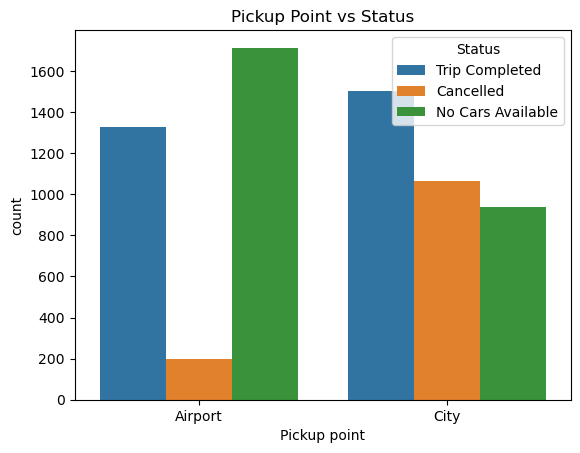

In [28]:
sns.countplot(x='Pickup point', hue='Status', data=df)
plt.title("Pickup Point vs Status")
plt.show()


##  1. Why did you pick the specific chart?

In [ ]:
This count plot shows how trip statuses (Completed, Cancelled, No Cars Available) vary across different pickup points
(City, Airport).

## 2. what is/are insight(s) found from chart ? 

## 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

# chart - 4 Cancelled vs No Cars Available (Line Plot)

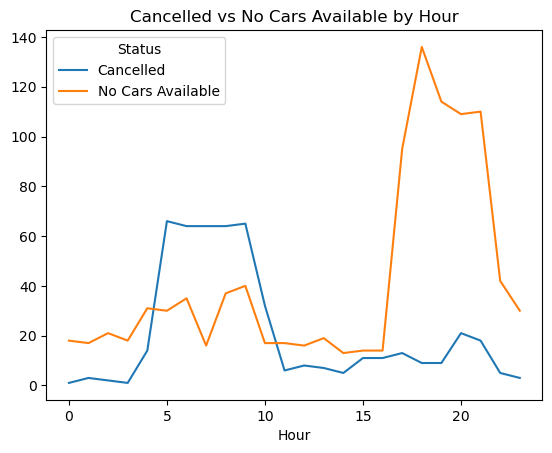

In [29]:
hourly = df.groupby(['Hour', 'Status']).size().unstack().fillna(0)
hourly[['Cancelled', 'No Cars Available']].plot()
plt.title("Cancelled vs No Cars Available by Hour")
plt.show()


## 1. Why did you pick the specific chart?

In [ ]:
 To compare the frequency of cancellations and no-car availability across different hours of the day.

## 2. What is/are the insight(s) found from the chart?

# chart - 5 Top 10 Most Active Drivers

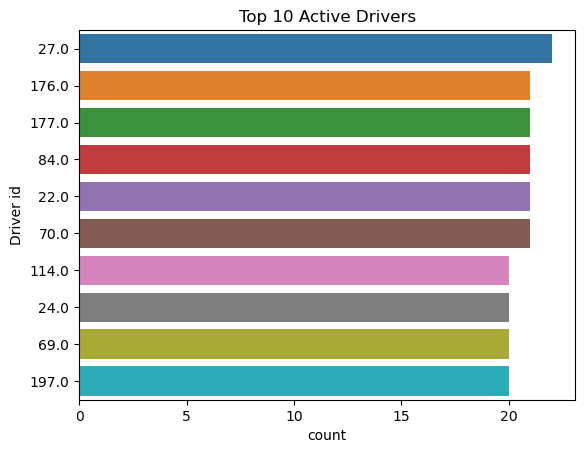

In [30]:
sns.countplot(y='Driver id', data=df[df['Driver id'].notna()],
              order=df['Driver id'].value_counts().iloc[:10].index)
plt.title("Top 10 Active Drivers")
plt.show()


## 1. Why did you pick the specific chart?

##  2. What is/are the insight(s) found from the chart?

# chart - 6 Completed Trips by Hour

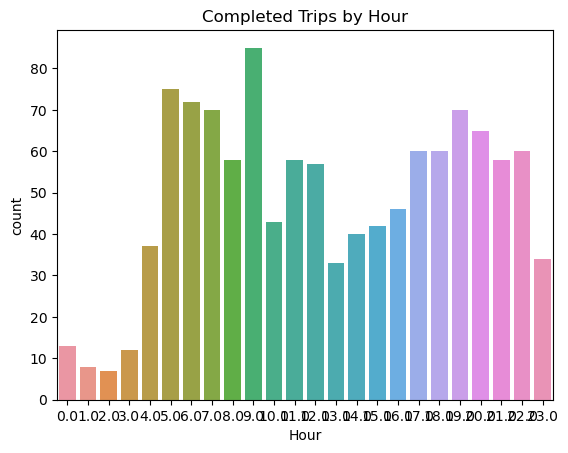

In [31]:
sns.countplot(x='Hour', data=df[df['Status'] == 'Trip Completed'])
plt.title("Completed Trips by Hour")
plt.show()


# chart - 7 Cancelled Requests by Hour

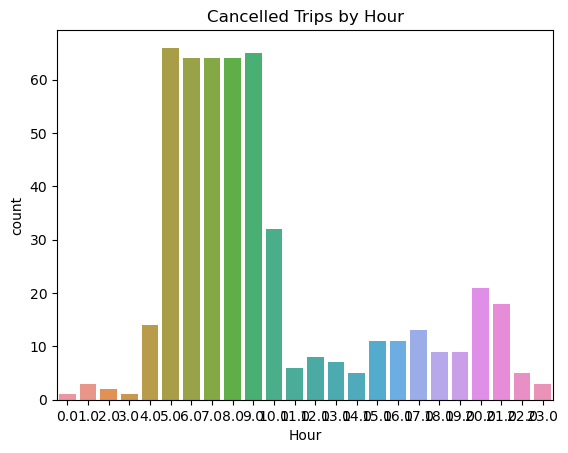

In [32]:
sns.countplot(x='Hour', data=df[df['Status'] == 'Cancelled'])
plt.title("Cancelled Trips by Hour")
plt.show()


# chart - 8  Trip Status by Hour (Stacked Bar)

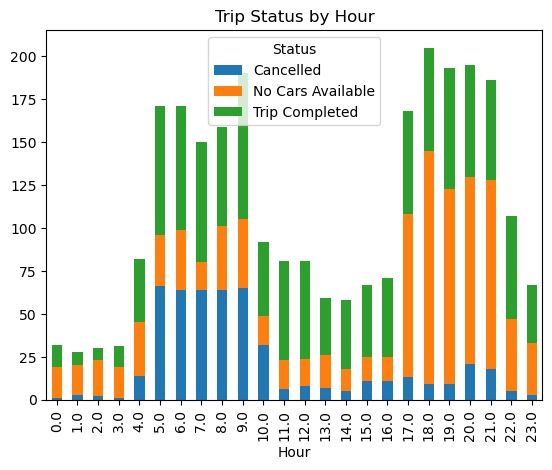

In [33]:
pd.crosstab(df['Hour'], df['Status']).plot(kind='bar', stacked=True)
plt.title("Trip Status by Hour")
plt.show()


# 5. soultion to business objective 

## what do you suggest the client to achieve business objective ?

# conclusion 